### Feature Extraction from Text - Manually

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
with open('One.txt') as txt:
    one_words=txt.read().lower().split()

In [71]:
one_words

['this',
 'is',
 'a',
 'story',
 'about',
 'dogs',
 'our',
 'canine',
 'pets',
 'dogs',
 'are',
 'furry',
 'animals']

In [72]:
uni_one_words=set(one_words)

In [76]:
with open('Two.txt') as txt:
    two_words=txt.read().lower().split()

In [77]:
two_words

['this',
 'story',
 'is',
 'about',
 'surfing',
 'catching',
 'waves',
 'is',
 'fun',
 'surfing',
 'is',
 'a',
 'popular',
 'water',
 'sport']

In [78]:
uni_two_words=set(two_words)

In [80]:
full_uni_words=set(uni_one_words)

In [81]:
full_uni_words.update(uni_two_words)

In [82]:
full_uni_words

{'a',
 'about',
 'animals',
 'are',
 'canine',
 'catching',
 'dogs',
 'fun',
 'furry',
 'is',
 'our',
 'pets',
 'popular',
 'sport',
 'story',
 'surfing',
 'this',
 'water',
 'waves'}

In [83]:
vocab={}

a=0

for word in full_uni_words:
    vocab[word]=a
    a+=1

In [84]:
vocab

{'about': 0,
 'sport': 1,
 'surfing': 2,
 'popular': 3,
 'is': 4,
 'catching': 5,
 'water': 6,
 'pets': 7,
 'waves': 8,
 'our': 9,
 'dogs': 10,
 'furry': 11,
 'a': 12,
 'story': 13,
 'canine': 14,
 'animals': 15,
 'fun': 16,
 'this': 17,
 'are': 18}

In [88]:
freq_one=[0]*len(full_uni_words)    

In [89]:
freq_one

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [90]:
for word in one_words:
    word_loc=vocab[word]
    freq_one[word_loc]+=1

In [91]:
freq_one

[1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1]

In [94]:
freq_two=[0]*len(full_uni_words)

In [95]:
freq_two

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [96]:
for word in two_words:
    word_loc=vocab[word]
    freq_two[word_loc]+=1

In [97]:
freq_two

[1, 1, 2, 1, 3, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0]

In [99]:
all_words=['']*len(full_uni_words)

In [100]:
full_uni_words

{'a',
 'about',
 'animals',
 'are',
 'canine',
 'catching',
 'dogs',
 'fun',
 'furry',
 'is',
 'our',
 'pets',
 'popular',
 'sport',
 'story',
 'surfing',
 'this',
 'water',
 'waves'}

In [101]:
for word in full_uni_words:
    word_loc=vocab[word]
    all_words[word_loc]=word

In [102]:
all_words

['about',
 'sport',
 'surfing',
 'popular',
 'is',
 'catching',
 'water',
 'pets',
 'waves',
 'our',
 'dogs',
 'furry',
 'a',
 'story',
 'canine',
 'animals',
 'fun',
 'this',
 'are']

In [103]:
bow=pd.DataFrame(data=[freq_one,freq_two],columns=all_words)

In [104]:
bow

,about,sport,surfing,popular,is,catching,water,pets,waves,our,dogs,furry,a,story,canine,animals,fun,this,are
0,1,0,0,0,1,0,0,1,0,1,2,1,1,1,1,1,0,1,1
1,1,1,2,1,3,1,1,0,1,0,0,0,1,1,0,0,1,1,0


### Feature Extraction from Text - CountVectorizer 

In [107]:
text=['This is line',
     'This is another line',
     'Completely different line']

In [109]:
text

['This is line', 'This is another line', 'Completely different line']

In [105]:
from sklearn.feature_extraction.text import CountVectorizer

In [106]:
cv=CountVectorizer()

In [110]:
cv_result=cv.fit_transform(text)

In [111]:
cv_result.todense()

matrix([[0, 0, 0, 1, 1, 1],
        [1, 0, 0, 1, 1, 1],
        [0, 1, 1, 0, 1, 0]], dtype=int64)

### Feature Extraction from Text - TfidfTransformer 


In [112]:
from sklearn.feature_extraction.text import TfidfTransformer

In [113]:
Tf=TfidfTransformer()

In [115]:
Tf_results=Tf.fit_transform(cv_result)

In [117]:
Tf_results.todense()

matrix([[0.        , 0.        , 0.        , 0.61980538, 0.48133417,
         0.61980538],
        [0.63174505, 0.        , 0.        , 0.4804584 , 0.37311881,
         0.4804584 ],
        [0.        , 0.65249088, 0.65249088, 0.        , 0.38537163,
         0.        ]])

### Feature Extraction from Text - TfidfVectorizer 


In [118]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [119]:
tfv=TfidfVectorizer()

In [121]:
tfv_result=tfv.fit_transform(text)

In [122]:
tfv_result.todense()

matrix([[0.        , 0.        , 0.        , 0.61980538, 0.48133417,
         0.61980538],
        [0.63174505, 0.        , 0.        , 0.4804584 , 0.37311881,
         0.4804584 ],
        [0.        , 0.65249088, 0.65249088, 0.        , 0.38537163,
         0.        ]])

In [123]:
df=pd.read_csv('../DATA/airline_tweets.csv')

In [125]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


<AxesSubplot:xlabel='airline_sentiment', ylabel='count'>

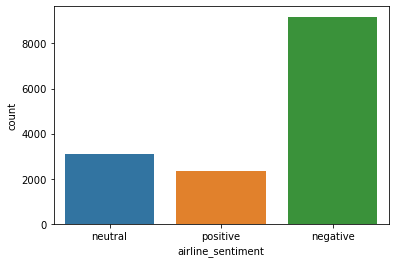

In [126]:
sns.countplot(data=df,x='airline_sentiment')

<AxesSubplot:xlabel='airline', ylabel='count'>

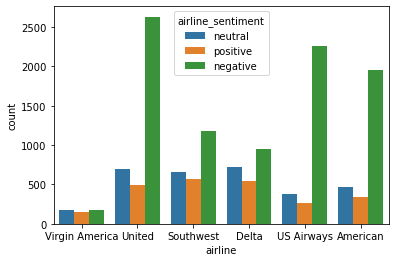

In [128]:
sns.countplot(data=df,hue='airline_sentiment',x='airline')

In [129]:
data=df[['text','airline_sentiment']]

In [130]:
data

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative
...,...,...
14635,@AmericanAir thank you we got on a different f...,positive
14636,@AmericanAir leaving over 20 minutes Late Flig...,negative
14637,@AmericanAir Please bring American Airlines to...,neutral
14638,"@AmericanAir you have my money, you change my ...",negative


In [131]:
X=data['text']
y=data['airline_sentiment']

In [132]:
from sklearn.model_selection import train_test_split

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [134]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [136]:
tfidf=TfidfVectorizer(stop_words='english')

In [137]:
X_train=tfidf.fit_transform(X_train)

In [138]:
X_test=tfidf.transform(X_test)

In [139]:
from sklearn.naive_bayes import MultinomialNB

nb_model=MultinomialNB()
nb_model.fit(X_train,y_train)

MultinomialNB()

In [141]:
from sklearn.linear_model import LogisticRegression

log_model=LogisticRegression(max_iter=10000)
log_model.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [143]:
from sklearn.svm import SVC,LinearSVC

svc_model=SVC()
svc_model.fit(X_train,y_train)

SVC()

In [144]:
linear_svc_model=SVC()
linear_svc_model.fit(X_train,y_train)

SVC()

In [145]:
from sklearn.metrics import classification_report, plot_confusion_matrix

In [155]:
def report(model):
    preds=model.predict(X_test)
    print(classification_report(y_test,preds))
    plot_confusion_matrix(model,X_test,y_test)
    

              precision    recall  f1-score   support

    negative       0.66      0.99      0.79      1817
     neutral       0.79      0.15      0.26       628
    positive       0.89      0.14      0.24       483

    accuracy                           0.67      2928
   macro avg       0.78      0.43      0.43      2928
weighted avg       0.73      0.67      0.59      2928



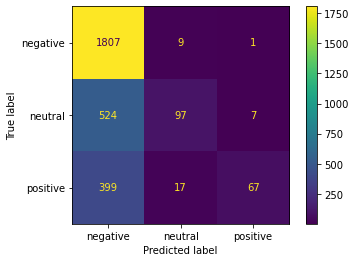

In [160]:
#Naive_Bayes Model

report(nb_model)

              precision    recall  f1-score   support

    negative       0.80      0.93      0.86      1817
     neutral       0.63      0.47      0.54       628
    positive       0.82      0.58      0.68       483

    accuracy                           0.77      2928
   macro avg       0.75      0.66      0.69      2928
weighted avg       0.77      0.77      0.76      2928



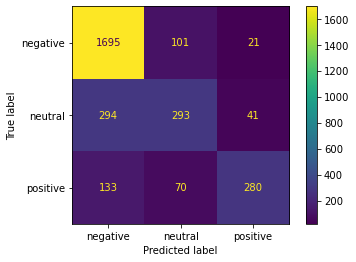

In [161]:
#Logistic_Regression

report(log_model)

              precision    recall  f1-score   support

    negative       0.78      0.95      0.86      1817
     neutral       0.67      0.41      0.51       628
    positive       0.81      0.56      0.66       483

    accuracy                           0.77      2928
   macro avg       0.75      0.64      0.67      2928
weighted avg       0.76      0.77      0.75      2928



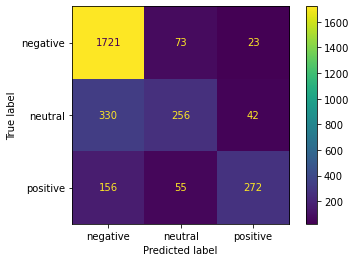

In [162]:
#Support_Vector_Machine
report(svc_model)

              precision    recall  f1-score   support

    negative       0.78      0.95      0.86      1817
     neutral       0.67      0.41      0.51       628
    positive       0.81      0.56      0.66       483

    accuracy                           0.77      2928
   macro avg       0.75      0.64      0.67      2928
weighted avg       0.76      0.77      0.75      2928



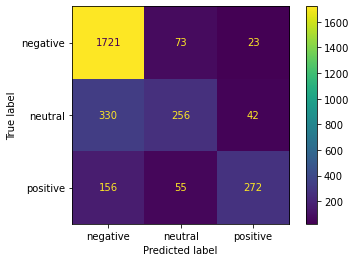

In [163]:
#Linear_Support_Vector_Machine
report(linear_svc_model)

In [164]:
from sklearn.pipeline import Pipeline

In [167]:
pipe=Pipeline([('tfidf',TfidfVectorizer()),
              ('log_model',LogisticRegression(max_iter=10000))])

In [168]:
pipe.fit(X,y)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('log_model', LogisticRegression(max_iter=10000))])

In [212]:
pipe.predict(['ok Flight'])

array(['neutral'], dtype=object)

In [213]:
pipe.predict(['bad Flight'])

array(['negative'], dtype=object)

In [214]:
pipe.predict(['good Flight'])

array(['positive'], dtype=object)

## Exercise

# Text Classification Assessment 

### Goal: Given a set of text movie reviews that have been labeled negative or positive

For more information on this dataset visit http://ai.stanford.edu/~amaas/data/sentiment/

## Complete the tasks in bold below!

**Task: Perform imports and load the dataset into a pandas DataFrame**
For this exercise you can load the dataset from `'../DATA/moviereviews.csv'`.

In [1]:
# CODE HERE

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('../DATA/moviereviews.csv')

In [3]:
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


**TASK: Check to see if there are any missing values in the dataframe.**

In [5]:
df.isnull().sum()

label      0
review    35
dtype: int64

label      0
review    35
dtype: int64

**TASK: Remove any reviews that are NaN**

In [6]:
df=df.dropna()

In [7]:
df.isnull().sum()

label     0
review    0
dtype: int64

In [8]:
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


**TASK: Check to see if any reviews are blank strings and not just NaN. Note: This means a review text could just be: "" or "  " or some other larger blank string. How would you check for this? Note: There are many ways! Once you've discovered the reviews that are blank strings, go ahead and remove them as well. [Click me for a big hint](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.isspace.html)**

In [30]:
df[df['review'].apply(lambda x:x.isspace())]

,label,review
57,neg,
71,pos,
147,pos,
151,pos,
283,pos,
307,pos,
313,neg,
323,pos,
343,pos,
351,neg,


In [31]:
len(df[df['review'].apply(lambda x:x.isspace())])

27

27

,label,review
57,neg,
71,pos,
147,pos,
151,pos,
283,pos,
307,pos,
313,neg,
323,pos,
343,pos,
351,neg,


In [38]:
df=df.drop(df[df['review'].apply(lambda x:x.isspace())].index)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1938 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1938 non-null   object
 1   review  1938 non-null   object
dtypes: object(2)
memory usage: 45.4+ KB


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1938 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1938 non-null   object
 1   review  1938 non-null   object
dtypes: object(2)
memory usage: 45.4+ KB


**TASK: Confirm the value counts per label:**

In [40]:
df['label'].value_counts()

neg    969
pos    969
Name: label, dtype: int64

In [23]:
#CODE HERE

pos    969
neg    969
Name: label, dtype: int64

## EDA on Bag of Words

**Bonus Task: Can you figure out how to use a CountVectorizer model to get the top 20 words (that are not english stop words) per label type? Note, this is a bonus task as we did not show this in the lectures. But a quick cursory Google search should put you on the right path.  [Click me for a big hint](https://stackoverflow.com/questions/16288497/find-the-most-common-term-in-scikit-learn-classifier)**

In [42]:
neg=df[df['label']=='neg']

In [43]:
pos=df[df['label']=='pos']

In [44]:
from sklearn.feature_extraction.text import CountVectorizer

In [76]:
cv=CountVectorizer(stop_words='english')

In [77]:
cv.fit_transform(df)

<2x2 sparse matrix of type '<class 'numpy.int64'>'
	with 2 stored elements in Compressed Sparse Row format>

In [89]:
matrix = cv.fit_transform(df[df['label']=='neg']['review'])
freqs = zip(cv.get_feature_names(), matrix.sum(axis=0).tolist()[0])    

print("Top 20 words used for Negative reviews.")
print(sorted(freqs, key=lambda x: -x[1])[:20])

Top 20 words used for Negative reviews.
[('film', 4063), ('movie', 3131), ('like', 1808), ('just', 1480), ('time', 1127), ('good', 1117), ('bad', 997), ('character', 926), ('story', 908), ('plot', 888), ('characters', 838), ('make', 813), ('really', 743), ('way', 734), ('little', 696), ('don', 683), ('does', 666), ('doesn', 648), ('action', 635), ('scene', 634)]


In [88]:
matrix = cv.fit_transform(df[df['label']=='pos']['review'])
freqs = zip(cv.get_feature_names(), matrix.sum(axis=0).tolist()[0])    

print("Top 20 words used for Positive reviews.")
print(sorted(freqs, key=lambda x: -x[1])[:20])

Top 20 words used for Positive reviews.
[('film', 5002), ('movie', 2389), ('like', 1721), ('just', 1273), ('story', 1199), ('good', 1193), ('time', 1175), ('character', 1037), ('life', 1032), ('characters', 957), ('way', 864), ('films', 851), ('does', 828), ('best', 788), ('people', 769), ('make', 764), ('little', 751), ('really', 731), ('man', 728), ('new', 702)]


Top 20 words used for Negative reviews.
[('film', 4063), ('movie', 3131), ('like', 1808), ('just', 1480), ('time', 1127), ('good', 1117), ('bad', 997), ('character', 926), ('story', 908), ('plot', 888), ('characters', 838), ('make', 813), ('really', 743), ('way', 734), ('little', 696), ('don', 683), ('does', 666), ('doesn', 648), ('action', 635), ('scene', 634)]


Top 20 words used for Positive reviews.
[('film', 5002), ('movie', 2389), ('like', 1721), ('just', 1273), ('story', 1199), ('good', 1193), ('time', 1175), ('character', 1037), ('life', 1032), ('characters', 957), ('way', 864), ('films', 851), ('does', 828), ('best', 788), ('people', 769), ('make', 764), ('little', 751), ('really', 731), ('man', 728), ('new', 702)]


### Training and Data

**TASK: Split the data into features and a label (X and y) and then preform a train/test split. You may use whatever settings you like. To compare your results to the solution notebook, use `test_size=0.20, random_state=101`**

In [126]:
X=df['review']
y=df['label']

In [127]:
from sklearn.model_selection import train_test_split

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

### Training a Mode

**TASK: Create a PipeLine that will both create a TF-IDF Vector out of the raw text data and fit a supervised learning model of your choice. Then fit that pipeline on the training data.**

In [129]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

In [95]:
#tfidf=TfidfVectorizer(stop_words='english')

In [97]:
#X_train=tfidf.fit_transform(X_train)

In [98]:
#X_test=tfidf.transform(X_test)

In [96]:
#lsvc=LinearSVC()

In [110]:
#nb_model=MultinomialNB()

In [130]:
from sklearn.pipeline import Pipeline

In [131]:
pipe=Pipeline([('tfidf',TfidfVectorizer()),
              ('lsvc',LinearSVC())])

In [132]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('lsvc', LinearSVC())])

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

**TASK: Create a classification report and plot a confusion matrix based on the results of your PipeLine.**

In [133]:
preds=pipe.predict(X_test)

In [134]:
from sklearn.metrics import classification_report,plot_confusion_matrix

In [135]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

         neg       0.81      0.86      0.83       191
         pos       0.85      0.81      0.83       197

    accuracy                           0.83       388
   macro avg       0.83      0.83      0.83       388
weighted avg       0.83      0.83      0.83       388



              precision    recall  f1-score   support

         neg       0.81      0.86      0.83       191
         pos       0.85      0.81      0.83       197

    accuracy                           0.83       388
   macro avg       0.83      0.83      0.83       388
weighted avg       0.83      0.83      0.83       388



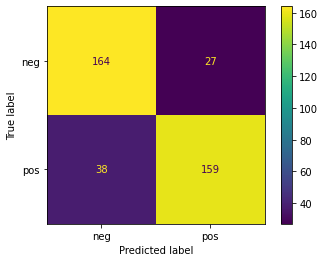

In [136]:
plot_confusion_matrix(pipe,X_test,y_test)

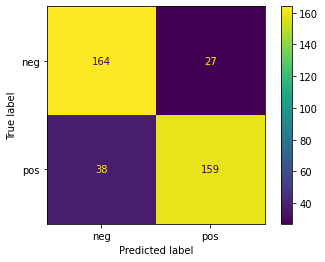

## Great job!